---
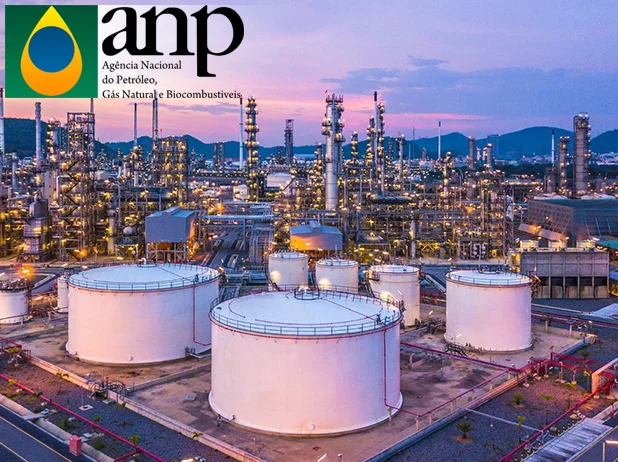


---




#<font color='green'> Descrição do Projeto:</font>


---


## <font color='yellow'>I - Introdução</font>

Você e a sua equipe foram escalados pela `Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP)`para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural:


*   mantém o Banco de Dados de Exploração e Produção (BDEP);
*   promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
*   recebe e torna públicas as notificações de descobertas;
*   divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.



A `ANP` também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.

As fontes de dados que serão utilizadas no projeto estão disponíveis no portal dados.gov. Serão utilizados os arquivos dos meses de junho e julho de 2021 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil. Para baixar os arquivos, basta clicar nos meses que estão destacados anteriormente.

---



##<font color='yellow'>II - As perguntas a serem respondidas são:</font>


01.   Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
02.   Qual o preço médio da gasolina e do etanol nesses dois meses?
03.   Quais os 5 estados com o preço médio da gasolina e do etanol mais
caros?
04.   Qual o preço médio da gasolina e do etanol por estado?
05.   Qual o município que possui o menor preço para a gasolina e para o etanol?
06.   Qual o município que possui o maior preço para a gasolina e para o etanol?
07.   Qual a região que possui o maior valor médio da gasolina?
08.   Qual a região que possui o menor valor médio do etanol?
09.   Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10.  Há alguma relação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

---



##<font color='yellow'>III - O projeto deverá obrigatoriamente:</font>
*   Utilizar Jupyter Notebook ou Colab;
*   Realizar a limpeza dos dados;
*   Realizar análise exploratória;
*   O notebook utilizado na análise deve estar organizado, com descrições do
passo a passo da análise em markdown, apresentação dos resultados e insights
gerados;
*   Levantar mais duas perguntas e respondê-las da forma que achar mais
adequada.

---



##<font color='yellow'>IV - Apresentação:</font>


*   Todos os integrantes do grupo deverão apresentar;
*   Apresentar a análise realizada e organizada no Jupyter Notebook ou Colab;
*   Utilize slides de apoio para sua apresentação;
*   Apresentar a modelagem realizada e organizada em um powerpoint, PDF ou alguma outra ferramenta de apresentação que permita exportação em PDF;
*   Seu grupo terá 15 minutos (no máximo) para apresentar.

---


# <font color='green'>Execução</font>

##<font color='gray'>Importação e instalação das bibliotecas a serem utilizadas</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import utils
from utils import Colunas as col


In [2]:
combustiveis = utils.carregar_dados()
combustiveis.head(3)


,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Semana
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,2021-06-02,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,22
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,2021-06-02,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,22
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,2021-06-01,6.10,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,22


# <font color='Green'>Perguntas</font>

## <font color='blue'> Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição? </font>

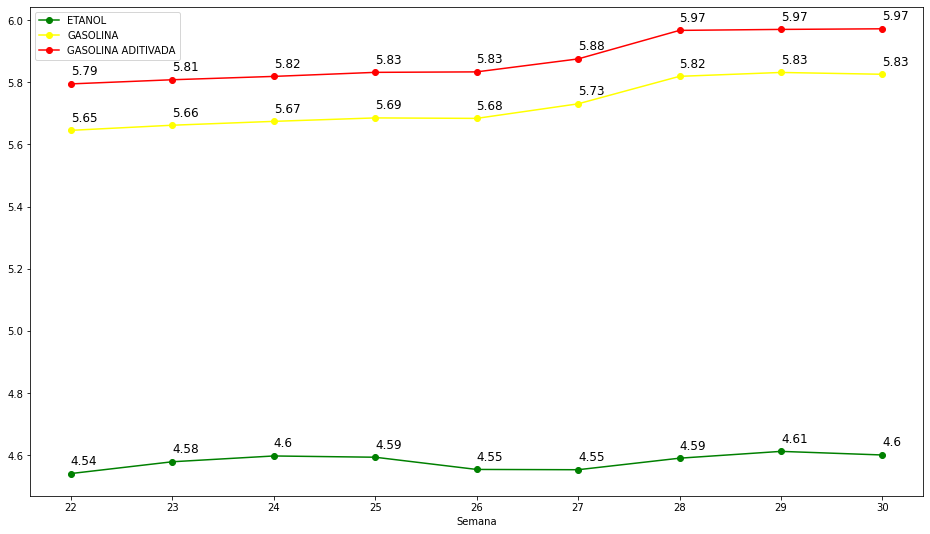

In [3]:
colunas_valores_produto_por_semana = [col.semana, col.produto, col.valor_venda]
valores_produto_por_semana = combustiveis[colunas_valores_produto_por_semana].copy(
)
medias_valores_produtos_por_semana = utils.media_por_produto(
    valores_produto_por_semana)
medias_valores_produtos_por_semana
utils.grafico_valores_produtos_por_semana(
    medias_valores_produtos_por_semana, 2, 0, 0.03)


## <font color='blue'>2) Qual o preço médio da gasolina e do etanol nesses dois meses?</font>

In [4]:
meses = {
    6: 'Junho',
    7: 'Julho'
}

valores_produtos_por_mes = combustiveis[[col.produto, col.valor_venda]].copy()
valores_produtos_por_mes['mes'] = combustiveis[col.data_coleta].dt.month.replace(meses)
media_valores_produtos_por_mes = utils.media_por_produto(
    valores_produtos_por_mes)
media_valores_produtos_por_mes


Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
mes,,,
Julho,4.587550,5.800254,5.943826
Junho,4.576389,5.671506,5.819346


## <font color='blue'>3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?</font>

In [5]:
valores_produto_por_estado = combustiveis[[col.estado, col.produto, col.valor_venda]].copy()
media_valores_produto_por_estado = valores_produto_por_estado.groupby([col.produto, col.estado]).mean()
# media_valores_produto_por_estado.sort_values([col.produto, col.valor_venda], inplace=True)

#removendo produto do multi índice e deixando somente o estado como Índice
# Isso facilita quando for aplicar o nlargest, pois ele retorna o valor e o índice.
media_valores_produto_por_estado.reset_index(level=['Produto'], inplace=True)
media_valores_produto_por_estado.groupby(col.produto)[col.valor_venda].nlargest()

Produto             Estado - Sigla
ETANOL              RS                5.806083
                    AC                5.535494
                    RN                5.524841
                    PA                5.333437
                    AP                5.314000
GASOLINA            AC                6.442674
                    RJ                6.298844
                    RN                6.154723
                    PI                6.107937
                    GO                6.039623
GASOLINA ADITIVADA  AC                6.424368
                    RJ                6.417112
                    PI                6.309395
                    RN                6.210551
                    RS                6.145830
Name: Valor de Venda, dtype: float64

## <font color='blue'>4) Qual o preço médio da gasolina e do etanol por estado?</font>

In [6]:
valores_produto_por_estado = combustiveis[[col.estado,col.produto, col.valor_venda]]
utils.media_por_produto(valores_produto_por_estado)

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Estado - Sigla,,,
AC,5.535494,6.442674,6.424368
AL,5.187422,5.958407,6.072673
AM,4.450337,5.559481,5.580307
AP,5.314000,4.986149,5.321176
BA,4.941465,5.960797,6.053127
CE,5.204020,5.807254,5.945513
DF,4.884223,5.854343,5.940984
ES,5.100665,5.863698,5.972921
GO,4.461115,6.039623,6.122082


Para responder as questões 5 e 6, calcularemos os valores Máximos e Mínimos e depois iemos filtar por Máximo e Mínimo.

In [7]:
valores_produto_por_municipio = combustiveis[[
    col.produto, col.municipio, col.valor_venda]]

min_max = pd.DataFrame(columns=valores_produto_por_municipio.columns)
min_max["Categoria"] = []

for _, group in valores_produto_por_municipio.groupby([col.produto]):
    minimo = group[group[col.valor_venda] == group[col.valor_venda].min()].copy()
    maximo = group[group[col.valor_venda] == group[col.valor_venda].max()].copy()
    minimo["Categoria"] = "Mínimo"
    maximo["Categoria"] = "Máximo"

    min_max = pd.concat([min_max, minimo, maximo])

## <font color='blue'>5) Qual o município que possui o menor preço para a gasolina e para o etanol?</font>

In [8]:

min_max[min_max["Categoria"] == "Mínimo"].drop_duplicates()

,Produto,Município,Valor de Venda,Categoria
9691,ETANOL,SANTA BARBARA D'OESTE,3.097,Mínimo
2595,GASOLINA,SORRISO,4.398,Mínimo
9043,GASOLINA ADITIVADA,COTIA,4.199,Mínimo


##<font color='blue'>6) Qual o município que possui o maior preço para a gasolina e para o etanol?</font>

In [9]:

min_max[min_max["Categoria"] == "Máximo"].drop_duplicates()

,Produto,Município,Valor de Venda,Categoria
41196,ETANOL,PELOTAS,6.999,Máximo
88054,GASOLINA,BAGE,6.999,Máximo
64496,GASOLINA ADITIVADA,BAGE,7.097,Máximo


##<font color='blue'>7) Qual a região que possui o maior valor médio da gasolina?</font>

In [10]:
valores_produto_por_regiao = combustiveis[[col.regiao, col.produto, col.valor_venda]]
media_valores_produto_por_regiao = utils.media_por_produto(valores_produto_por_regiao);

In [11]:
display(media_valores_produto_por_regiao.max().round(3))
display(media_valores_produto_por_regiao.idxmax())

Produto
ETANOL                5.090
GASOLINA              5.902
GASOLINA ADITIVADA    5.993
dtype: float64

Produto
ETANOL                NE
GASOLINA              CO
GASOLINA ADITIVADA    NE
dtype: object

##<font color='blue'>8) Qual a região que possui o menor valor médio do etanol?</font>

In [12]:
display(media_valores_produto_por_regiao.min().round(3))
display(media_valores_produto_por_regiao.idxmin())

Produto
ETANOL                4.355
GASOLINA              5.663
GASOLINA ADITIVADA    5.827
dtype: float64

Produto
ETANOL                SE
GASOLINA              SE
GASOLINA ADITIVADA    SE
dtype: object

##<font color='blue'>9) Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?</font>

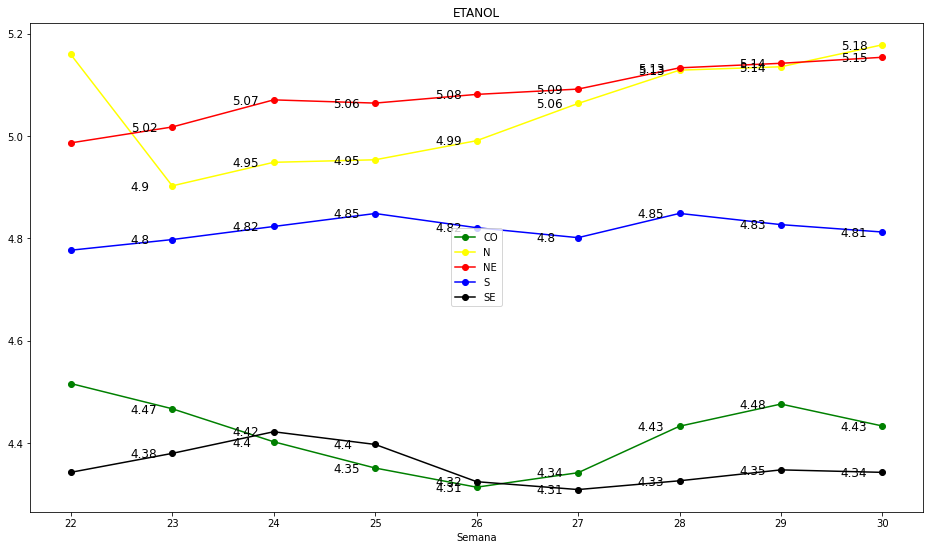

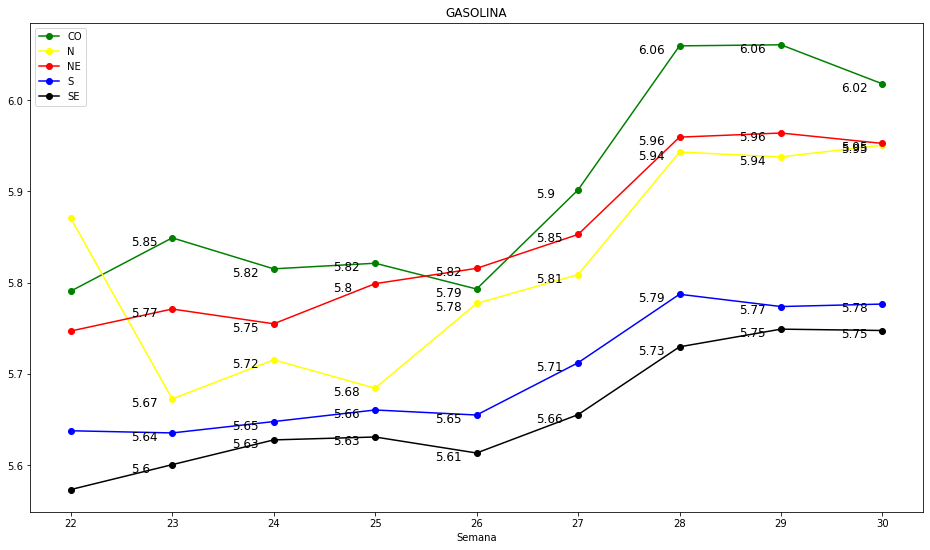

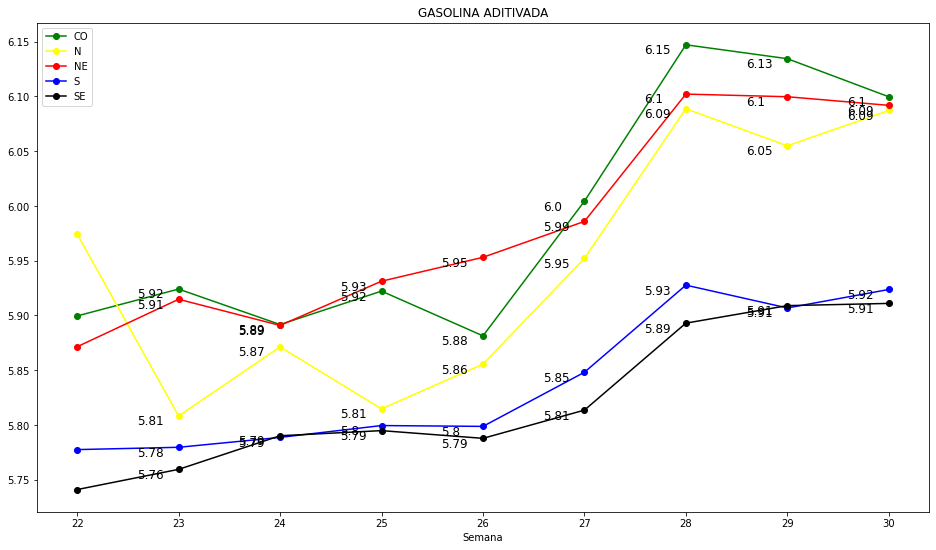

In [13]:
valores_produto_por_bandeira_por_semana = combustiveis[[col.produto, col.regiao, col.semana, col.valor_venda]]
media_valores_produto_por_bandeira_por_semana = valores_produto_por_bandeira_por_semana.groupby([col.produto, col.regiao, col.semana]).mean()
media_valores_produto_por_bandeira_por_semana.reset_index(inplace=True)

for name, group in media_valores_produto_por_bandeira_por_semana.groupby(col.produto):
    piv = pd.pivot_table(group, values=col.valor_venda, index=col.semana, columns=[col.regiao])
    utils.grafico_valores_produtos_por_semana(piv,nome=name, desvio_x=-0.41, desvio_y=-0.008, precisao=2, figsize=(16,9), fontsize=12)


##<font color='blue'>10) Há alguma relação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?</font>

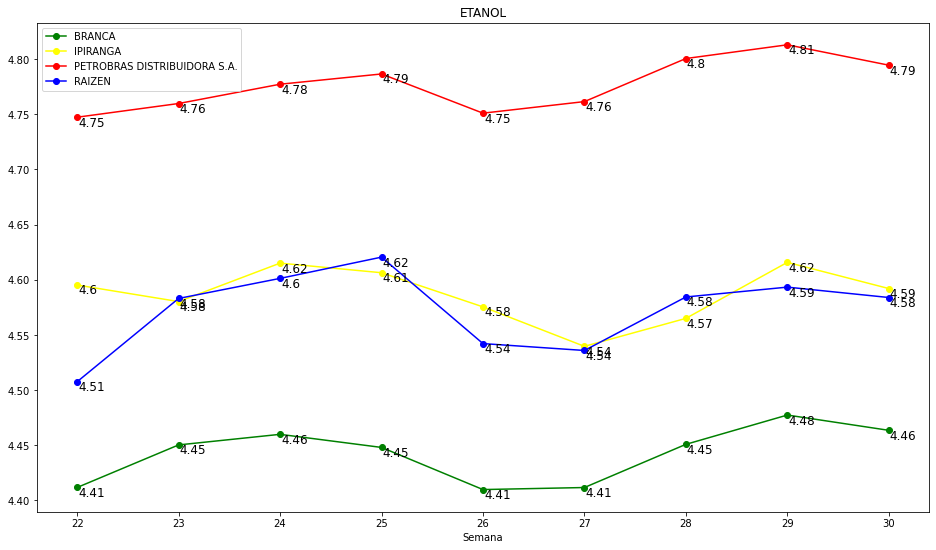

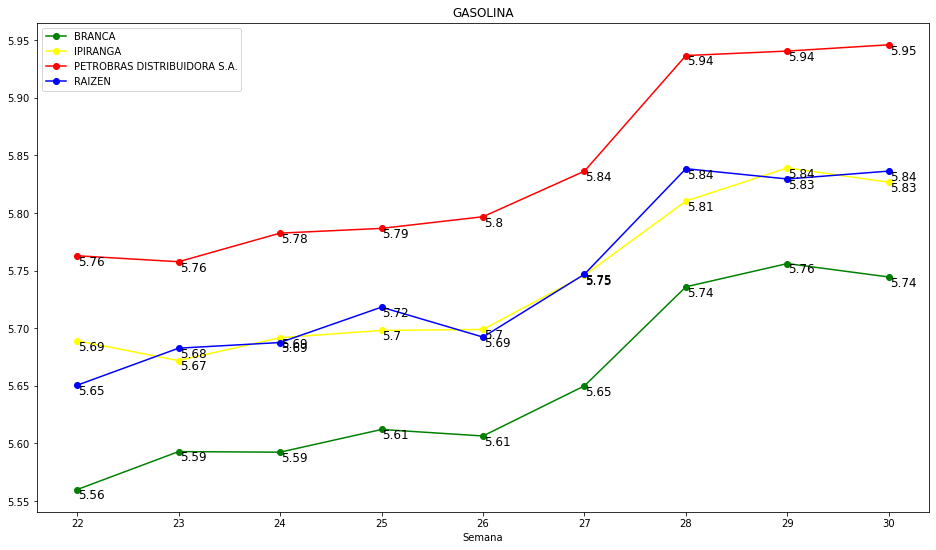

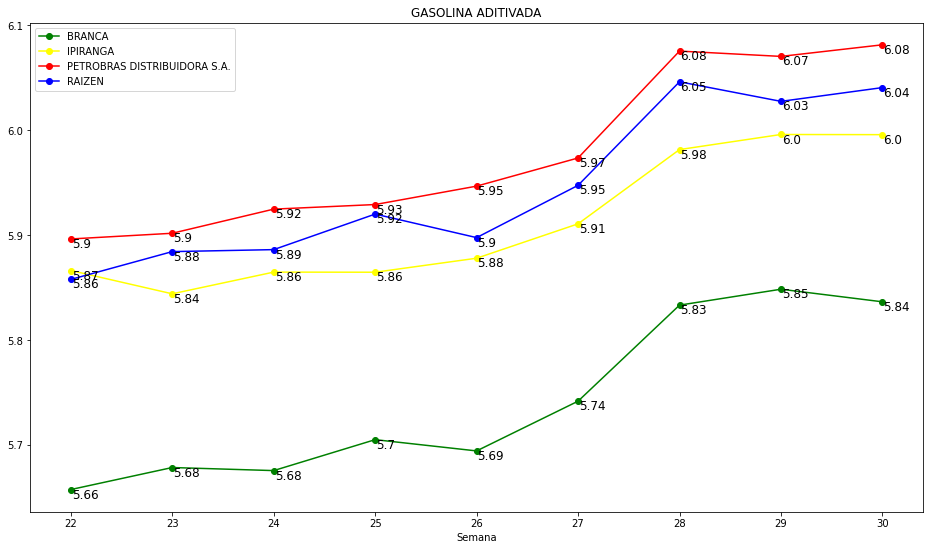

In [16]:
alores_produto_por_bandeira_por_semana = combustiveis[[col.produto, col.bandeira, col.semana, col.valor_venda]]

bandeiras = ['BRANCA','PETROBRAS DISTRIBUIDORA S.A.', 'IPIRANGA', 'RAIZEN']

valores_produto_por_bandeira_por_semana = valores_produto_por_bandeira_por_semana[valores_produto_por_bandeira_por_semana[col.bandeira].isin(bandeiras)]
media_valores_produto_por_bandeira_por_semana = valores_produto_por_bandeira_por_semana.groupby([col.produto, col.bandeira, col.semana]).mean()
media_valores_produto_por_bandeira_por_semana.reset_index(inplace=True)

for name, group in media_valores_produto_por_bandeira_por_semana.groupby(col.produto):
    piv = pd.pivot_table(group, values=col.valor_venda, index=col.semana, columns=[col.bandeira])
    utils.grafico_valores_produtos_por_semana(piv,nome=name, desvio_x=0.01, desvio_y=-0.008, precisao=2, figsize=(16,9), fontsize=12)
